In [1]:
print("hhi")

hhi


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()


True

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
google_gemini = ChatGoogleGenerativeAI(model="gemini-3-flash-preview", temperature=0.9)
google_gemini.invoke("What is the capital of France?").content


[{'type': 'text',
  'text': 'The capital of France is **Paris**.',
  'extras': {'signature': 'EsYBCsMBAb4+9vv0Xfv+d7vmmVg2u02agvFwL8bLtJh1nzcZ+Pk9dnENy1vKbD/AHDGT+yrbI43b+zpxA3s7+rqRnxWIKlqu0MqJ4Cid2mrDhfSTxajSoIcI1QyTsJEAAbgDL+g4RfZtxcRGegazgBayWzJlBds6ud2qfOOqvwi/NYmbtHHYywUm2cXdQCYLvihmdfVRta5TiUJdkjFUXrB4c5cGDhmvQUmXVQvetPr1jL+SYPxX0nMJ2N57W2wEjScosAOz990R'}}]

In [4]:
from typing_extensions import Annotated,TypedDict
import operator

In [5]:
from langchain_core.messages import ChatMessage, HumanMessage, SystemMessage, AIMessage,AnyMessage

In [6]:
class GraphState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]
    

In [7]:
def llm_call(state: GraphState) -> dict:
    """Call the LLM with messages and append AI response."""
    response = google_gemini.invoke(state["messages"])
    return {
        "messages": [AIMessage(content=response.content)]
    }


def token_counter(state: GraphState) -> dict:
    """Count tokens (simple word count) in the last AI message."""
    last_msg = state["messages"][-1]
    text = last_msg.content
    if isinstance(text, list):
        text = " ".join(str(item) for item in text)
    token_number = len(text.split())
    summary = f"Total token number in the generated answer (word count) is {token_number}"
    return {
        "messages": [AIMessage(content=summary)]
    }

In [8]:
from langgraph.graph import StateGraph


In [9]:
builder=StateGraph(GraphState)


In [10]:
builder.add_node(llm_call)
builder.add_node(token_counter)


In [11]:
builder.set_entry_point("llm_call")
builder.add_edge("llm_call", "token_counter")

builder.set_finish_point("token_counter")

In [12]:
app=builder.compile()

In [13]:
result = app.invoke({"messages": [HumanMessage(content="Hi, this is rakesh. Say hello in detail.")]})


In [14]:
result 

{'messages': [HumanMessage(content='Hi, this is rakesh. Say hello in detail.', additional_kwargs={}, response_metadata={}),
  AIMessage(content=[{'type': 'text', 'text': 'Hello, Rakesh! It is a sincere pleasure to meet you.\n\nI hope this message finds you in great spirits and that your day is going exactly as you planned. To say hello "in detail" is to acknowledge you not just as a user, but as an individual with unique goals, questions, and interests. \n\nAs an AI, I am here to be your assistant, your sounding board, and your information resource. Whether you are looking for help with a complex project, seeking creative inspiration, or just want to have an engaging conversation, I am fully at your disposal. \n\nSo, Rakesh, how can I make your day better? What is on your mind today?', 'extras': {'signature': 'EpQSCpESAb4+9vuIAL4MQOfycku5ITCLyM/YauYQzkHbcNKpWoVntuNBV5mL6g/Ww3l12tspjUyZaMDMbVli7fFjnYmmIEFsT/u+IDbb2iEajm6woXgDlEbRbeh9ndReEbJjY/4RvVlX6fxJ5EktVLxD8OG7F+p8bqcxUbe0XAEt0jy2Fv

In [15]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [16]:
api_wrapper = WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)

In [17]:
wiki_tool = WikipediaQueryRun(api_wrapper=api_wrapper)


In [18]:
wiki_tool.run({"query":"Paris capital France"})

"Page: Paris\nSummary: Paris is the capital and largest city of France, with an estimated city population of 2,047,602 in an area of 105.4 km2 (40.7 sq mi), and a metropolitan population of 13,239,090 as of January 2026. Located on the river Seine in the centre of the Île-de-France region, it is the largest metropolitan area and fourth-most populous city in the European Union (EU). Nicknamed the City of Light, partly because of its role in the Age of Enlightenment, Paris has been one of the world'"

In [19]:
from dotenv import load_dotenv
import os
load_dotenv()
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")


In [20]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

C:\Users\RAKESH PATRA\AppData\Local\Temp\ipykernel_2940\1389260594.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)


In [21]:
tool.invoke("score the scorecard of ind vs  nam in worldcup 2026")

[{'title': "Full Scorecard of India vs Namibia, ICC Men's T20 World Cup 2026 ...",
  'url': 'https://www.espn.com/cricket/series/8604/scorecard/1512736/india-vs-namibia-18th-match-group-a-icc-mens-t20-world-cup-2025-26',
  'content': '+ HH Pandya: 50 off 27 balls (4 x 4, 4 x 6)\n  + Innings Break: India - 209/9 in 20.0 overs (CV Varun 1)\n Namibia Innings [...] | UAE | 1 | 0 | 1 | 0 | -2.763 |\n| CAN | 1 | 0 | 1 | 0 | -2.85 | [...] | Team | M | W | L | PT | NRR |\n| IND | 2 | 2 | 0 | 4 | 3.05 |\n| PAK | 2 | 2 | 0 | 4 | 0.932 |\n| NED | 2 | 1 | 1 | 2 | 0.356 |\n| USA | 2 | 0 | 2 | 0 | -1.525 |\n| NAM | 2 | 0 | 2 | 0 | -2.884 |\n| Group B |\n| Team | M | W | L | PT | NRR |\n| SL | 2 | 2 | 0 | 4 | 3.125 |\n| AUS | 1 | 1 | 0 | 2 | 3.35 |\n| ZIM | 1 | 1 | 0 | 2 | 2.702 |\n| IRE | 2 | 0 | 2 | 0 | -2.175 |\n| OMA | 2 | 0 | 2 | 0 | -4.306 |\n| Group C |\n| Team | M | W | L | PT | NRR |\n| WI | 2 | 2 | 0 | 4 | 1.625 |\n| SCOT | 2 | 1 | 1 | 2 | 0.95 |\n| ITA | 2 | 1 | 1 | 2 | -0.352 |\n| ENG | 2

In [22]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()



In [23]:
search.invoke("the heeight of himalaya mountain")

"The Himalayas , [b] or Himalaya , [c] is a mountain range in Asia separating the plains of the Indian subcontinent from the Tibetan Plateau. The range has some of the Earth 's highest peaks, including the highest, Mount Everest. More than 100 peaks exceeding elevations of 7,200 m (23,600 ft) above sea level lie in the Himalayas . Himalayas are a great mountain system of Asia forming a barrier between the Plateau of Tibet to the north and the alluvial plains of the Indian subcontinent to the south. The Himalayas include the highest peaks in the world, most notably Mount Everest. Learn more about the mountain system. Last Updated: January 1, 2026. Which is the highest peak of Himalaya ? Discover the top 10 highest peaks, heights, locations, and why Everest and Kangchenjunga dominate the Himalayan range! Himalayan heights are characterized by the highest mountains on earth, the Great Himalaya range being the most prominent with its ever-lasting snow and wide-spread glaciation. More than 

In [24]:
from langchain.tools import tool


In [25]:
@tool
def add(a:int,b:int):
    ''' this is a addition tool'''
    return a+b

In [26]:
add.invoke({"a": 5, "b": 3})

8

In [27]:
add.name

'add'

In [28]:
add.description

'this is a addition tool'

In [29]:
add.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [30]:
@tool
def get_word_length(text:str)-> int:
    """
    Get the length of each word in a text string.
    
    Args:
        text (str): Input text string
        
    Returns:
        dict: Dictionary with words as keys and their lengths as values
    """
    words = text.split()
    return {word: len(word) for word in words}

In [31]:
get_word_length.invoke({"text": "Hello world from LangChain"})

{'Hello': 5, 'world': 5, 'from': 4, 'LangChain': 9}

In [32]:
import yfinance as yf


In [33]:
@tool 
def get_stock_price(ticker:str)-> str:
    """Get the current stock price for a given ticker symbol."""
    stock = yf.Ticker(ticker)
    price = stock.info['currentPrice']
    return f"The current stock price of {ticker} is {price} USD."

In [34]:
get_stock_price.invoke({"ticker": "AAPL"})

'The current stock price of AAPL is 255.78 USD.'

In [35]:
google_gemini

ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-3-flash-preview', temperature=0.9, client=<google.genai.client.Client object at 0x000002176A59C050>, default_metadata=(), model_kwargs={})

In [36]:
tools=[get_stock_price, wiki_tool, search]

In [37]:
gemini_bind_tool=google_gemini.bind_tools(tools)

In [38]:
result=gemini_bind_tool.invoke("What is the current stock price of AAPL and what is the height of himalaya mountain?")

In [39]:
result.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'AAPL'},
  'id': '930378da-6c89-4364-aedb-adaf13b27aa2',
  'type': 'tool_call'},
 {'name': 'wikipedia',
  'args': {'query': 'Himalayas height'},
  'id': 'bf490a01-5054-4aff-8904-c4c3ca521c38',
  'type': 'tool_call'}]

In [40]:
builder=StateGraph(GraphState)

In [41]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState, StateGraph, END, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [42]:
def function1(state:MessagesState):
    pass

In [43]:
function2=ToolNode(tools)

In [44]:
workflw=StateGraph(MessagesState)

In [45]:
workflw.add_node("llm", function1)

In [46]:
workflw.add_node("tools", function2)

In [ ]:
workflw.add_edge(START, "llm")

workflw.add_conditional_edges(
"llm",
tools_condition,)

workflw.add_edge("tools", "llm")

In [48]:
app=workflw.compile()

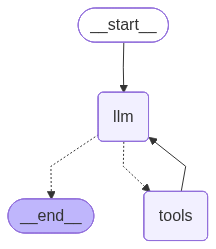

In [49]:
from IPython.display import Image, display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))